# Introduction
This section will introduce you to OpenCV!

OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes several hundreds of computer vision algorithms. OpenCV supports a wide variety of programming languages such as C++, Python, Java, etc, and is available on different platforms including Windows, Linux, OS X, Android, and iOS. This tutorial focus on OpenCV-Python which is the Python API for OpenCV.

Contents:

0. Infrastructure
1. Import
2. Image IO and basic operations
3. Plot
4. Video
5. Learn new function

# Infrastructure

# Ipython Notebook

All homework can be done in Ipython Notebook, and we recommend you to do so. We will not take points away based on what tools you use to do the homework, as long as it's in a Ipython Notebook.

You can finish homework by using:
1. Google Colab.
It's an online environment that can run Ipython Notebook. As long as you have a google account (so basically your NYU account), you should be able to access it.
   - Pros:
      1. Most of required packages are pre-installed
      2. Almost no hardware requirement.
   - Cons:
      1. The file system is not as intuitive.
      2. Needs internet connection
      3. Being idle too long can result in lost progress
      4. It's harder to utilize your hardware (e.g. your computer's camera) inside Colab.

2. Your own Jupyter environment.
Please see [Jupyter's official tutorial](https://jupyter.org/install) for installing. I recommend installing it via Conda. Feel free to schedule an office hour to discuss how to use Conda or how to set up a local Jupyter environment.
   - Pros:
      1. More freedom
      2. More intuitive file system
   - Cons:
      1. You will need to install and manage all the packages yourself.

3. Alternative environment manager for Python without the Anaconda baggage
    - Pipenv: https://pipenv.pypa.io (classic!)
    - Poetry: https://python-poetry.org (the nicer looking Pipenv)




## File System on Google Colab

If you are using a local Jupyter environment, managing files should be very intuitive, but for Google Colab we need a few extra steps. There are two major ways to do this on Colab.

1. Upload to the Current Session
  - Click the little folder icon called "Files" on the left panel
  - In the opened window, click the leftmost icon (it has an up arrow) called "Upload to session storage"
  - Upload the files
  - Note that these files will be lost once you close this tab and you will need to re-upload

2. Mount your Google Drive
  - Click the little folder icon called "Files" on the left panel
  - In the opened window, click the rightmost icon (it has an G Drive icon) called "Mount Drive".
  - Follow the instruction provided by Google
  - This way you don't have to re-upload files every time you open a new Colab session.

# What is OpenCV?
- A computer vision library! Pretty much the gold standard and used in some way or another in _most_ CV applications.
- Originally from Intel and now it's open sourced under Apache 2 license.
- Originally written as a C++ library, now it has many bindings in various other languages - Python, Java, Matlab and even Javascript (gasp!)
- Lots of classical methods available straight out of the box! 
    - [SIFT feature extraction and descriptor](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform) 
    - [Kanade–Lucas–Tomasi (KLT) tracker](https://en.wikipedia.org/wiki/Kanade%E2%80%93Lucas%E2%80%93Tomasi_feature_tracker) 
- More info via the [documentation](https://docs.opencv.org/4.x/).

# Import

Here is the [tutorial link](https://docs.opencv.org/master/da/df6/tutorial_py_table_of_contents_setup.html) for installing OpenCV-Python on different operating systems.

Verify the installation:

In [1]:
# Check the version of OpenCV-Python

import cv2
print( cv2.__version__ )

4.6.0


You may notice that even though the version of OpenCV starts with a 4, (and OpenCV 5 is already in development), we are importing "cv2". There is a bit of history behind this and [this Stackoverflow post](https://stackoverflow.com/questions/10417108/what-is-different-between-all-these-opencv-python-interfaces) explains it well. Long story short, it has nothing to do with OpenCV's version and there is indeed a "cv". But you should always import "cv2" when using Python

# Image IO and basic operations

## When Using Google Colab

For [some reasons](https://github.com/jupyter/notebook/issues/3935), you cannot use OpenCV's `imshow` function in Colab, so we have to settle with Colab's own `cv2_imshow`

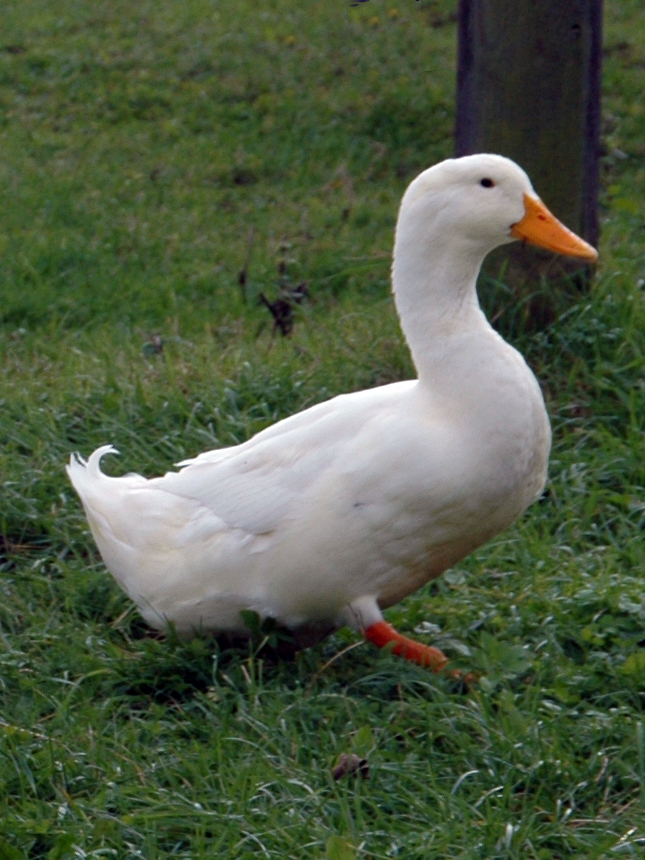

True

In [8]:
import sys
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Read an image as BGR. Python will not throw an error when the path is invalid. Instead, the img variable will be None
img = cv2.imread('duck.jpg')

# Check if the image was loaded correctly
if img is None:
    sys.exit("Could not read the image.")

# Display an image using cv2.imshow()

cv2_imshow(img)

# Write an image. It will return True when writing is successful
cv2.imwrite('duck_new.jpg',img)

## When Using Your Own Jupyter Environment

Now we can use `cv2.imshow` to display image in a new window

In [2]:
import sys
from matplotlib import pyplot as plt

# Read an image as BGR. Python will not throw an error when the path is invalid. Instead, the img variable will be None
img = cv2.imread('duck.jpg')

# Check if the image was loaded correctly
if img is None:
    sys.exit("Could not read the image.")

# Display an image using cv2.imshow()
cv2.imshow("test", img)

# Wait for any key to close the image window
cv2.waitKey(0)
cv2.destroyAllWindows()

# Write an image. It will return True when writing is successful
cv2.imwrite('duck_new.jpg', img)

True

But I prefer to use `matplotilb` instead via `plt.imshow()`!

## Other Operations

It's worth noting that OpenCV doesn't follow the conventional RGB order. It's actually BGR. Again there is a bit of history here. If you find it interesting, please take a look at this [article and its comment section](https://learnopencv.com/why-does-opencv-use-bgr-color-format/#disqus_thread).

In [3]:
# img class. Since we are using 'cv2', it will be a numpy array
print(img.__class__)

# The shape of RGB image contains width, height, and channel. Some package does not follow this convention.
print(img.shape)

# Access the BGR value of an image using row and column index
print(img[0,0])

<class 'numpy.ndarray'>
(860, 645, 3)
[ 57 100  79]


Sometimes you may want to display images using other plotting package (e.g. matplotlib). Since OpenCV reads images in BGR order, there is some preprocessing needed

[ 79 100  57]


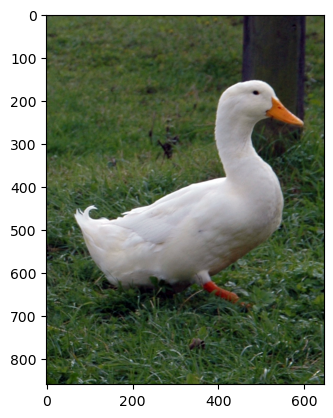

In [4]:
# Advanced: Display an image using matplotlib.pyplot.imshow()
# transform BGR image to RGB format
img2 = img[:,:,::-1]

# verify that BGR changed to RGB
print(img2[0,0])

# Display the image
plt.imshow(img2)
plt.show()

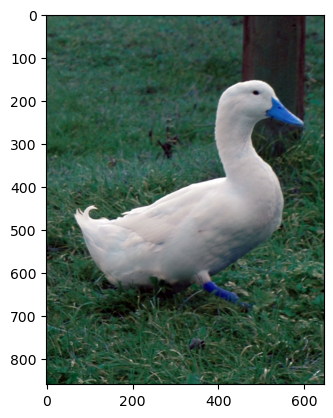

In [5]:
plt.imshow(img)
plt.show()

[ 79 100  57]


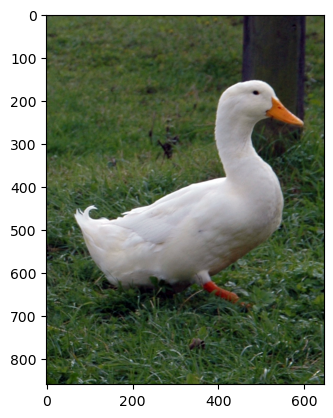

In [6]:
# alternatively, OpenCV has built-in function to convert from BGR to RGB
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# verify that BGR changed to RGB
print(img3[0,0])

# Display the image
plt.imshow(img3)
plt.show()

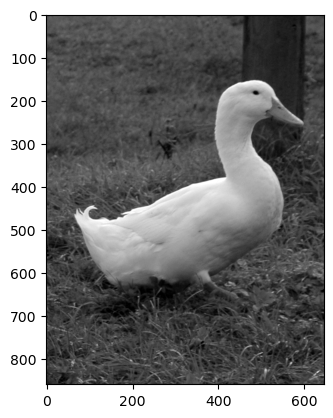

In [7]:
# Read an image as grayscale by passing the value 0
# Read an image as RGB by passing the value 1
img_gray = cv2.imread('duck.jpg', cv2.IMREAD_GRAYSCALE)

#img_gray = cv2.imread('duck.jpg', 0) #equivalent

plt.imshow(img_gray,cmap="gray")

In [8]:
# The shape of grayscale image contains only width and height.
print(img_gray.shape)

(860, 645)


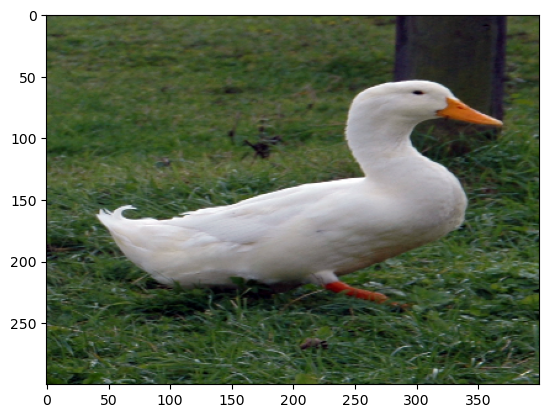

In [9]:
# Resize an image
resized_image = cv2.resize(img2, (400,300))
plt.imshow(resized_image)

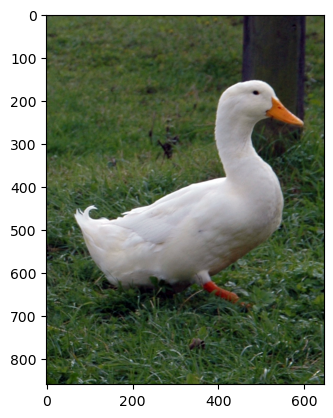

In [10]:
# Copy an image
img2_copy = img2.copy()
plt.imshow(img2_copy)

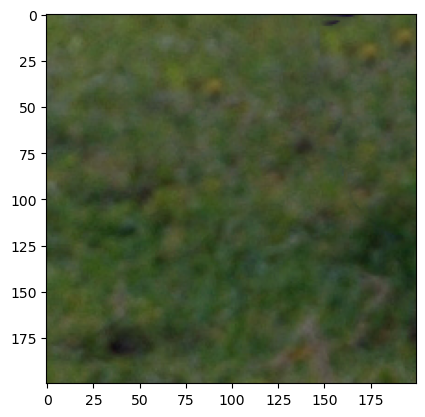

In [11]:
# Crop an image from top left (x1,y1) to bottom right (x2,y2): img[x1:x2,y1:y2]
imgCrop=img2[0:200,200:400]
plt.imshow(imgCrop)

# Plot

Here we showcase some very basic plotting functions

(300, 300, 3)


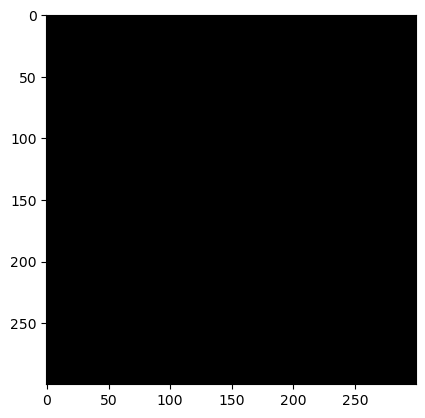

In [13]:
# Create an image by using the NumPy package
import numpy as np

# Pass the shape of the image as a tuple (width, height, channel) and datatype as type
img=np.zeros((300,300,3),dtype="uint8")
plt.imshow(img)
print(img.shape)

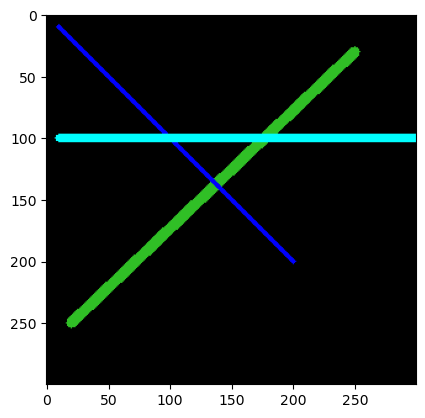

In [14]:
# Draw lines
# cv2.line(image, the starting point, the ending point, color RGB values, thickness)
line = cv2.line(img, (250,30), (20,250), (48,191,38),8)
line = cv2.line(img, (10,10), (200,200), (0,0,255),3)
line = cv2.line(img, (10,100), (300,100), (0,255,255),5)
plt.imshow(line)

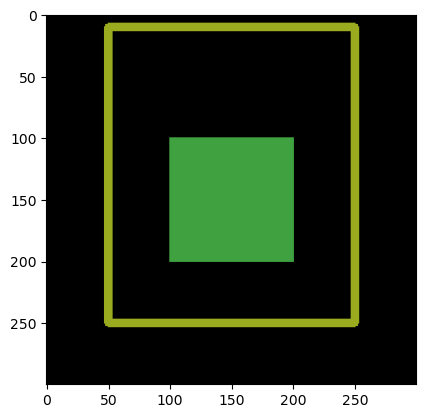

In [15]:
# Draw rectangle
img=np.zeros((300,300,3),dtype="uint8")
# cv2.rectangle(img, top left point, bottom right point, color RGB value, thickness)
rect=cv2.rectangle(img,(50,10),(250,250),(155,171,32),6)
# If the thickness value is -1 it will fill the shape with color
rect=cv2.rectangle(img,(100,100),(200,200),(63,161,63),-1)
plt.imshow(rect)

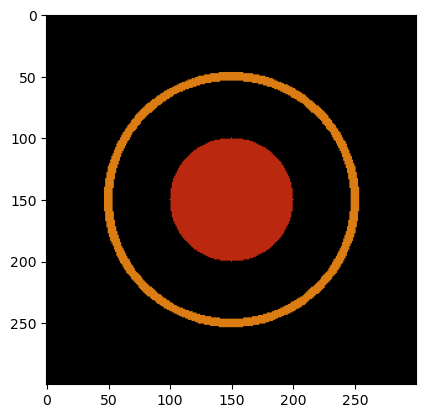

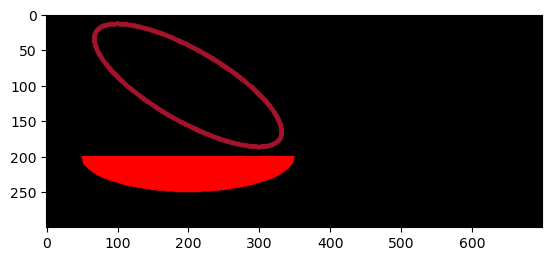

In [19]:
# Draw a circle
img=np.zeros((300,300,3),dtype="uint8")
# cv2.circle(img, center, radius, color RGB value, thickness)
circle=cv2.circle(img,(150,150),100,(219,125,18),6)
circle=cv2.circle(img,(150,150),50,(186,41,15),-1)
plt.imshow(circle)
plt.show()

# Draw an eclippse
img=np.zeros((300,700,3),dtype="uint8")
# cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness)
el=cv2.ellipse(img,(200,200),(150,50),0,0,180,255,-1)
el=cv2.ellipse(img,(200,100),(150,50),30,0,360,(163,20,44),5)
plt.imshow(el)
plt.show()

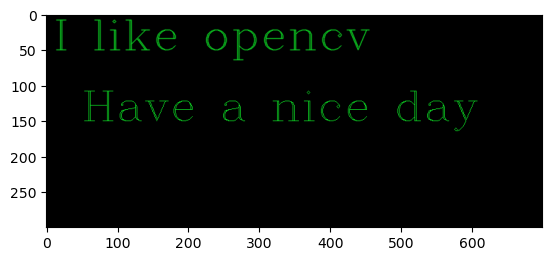

In [24]:
# Draw text on the image
img=np.zeros((300,700,3),dtype="uint8")
font=cv2.FONT_HERSHEY_COMPLEX
# cv2.putText(img, text, top left point, fontFace, fontScale, color, thickness,lineType)
vb=cv2.putText(img,"I like opencv",(10,50),font,2,(13,209,35),1,cv2.LINE_AA)
vb=cv2.putText(img,"Have a nice day",(50,150),font,2,(13,209,35),1,cv2.LINE_8)
plt.imshow(vb)

# Video

Playing video from file

In [2]:
import cv2
import matplotlib.pyplot as plt

# Change camera index to video file name
cap = cv2.VideoCapture('snowboard_jump.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if not ret:
        break
    
    #Let's put to to grayscale, because we can
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('test', gray)

    # To play the video at a normal speed, set the parameter to 25ms
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Read a video, flip every frame in vertical direction, and save the video:

In [3]:
cap = cv2.VideoCapture('snowboard_jump.mp4')

height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Define the codec from https://www.fourcc.org/codecs.php
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output5.avi', fourcc, 30, (width, height), isColor=True)

while cap.isOpened():
    # get validity boolean and current frame
    ret, frame = cap.read()

    # if valid tag is false, loop back to start
    if not ret:
        break
    else:
        frame = cv2.resize(frame, (width, height))

        # flip the frame in vertical direction
        frame = cv2.flip(frame,0)
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()

# Learn new functions

Here is the official OpenCV-Python [Tutorial link](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html).